In [1]:
import pandas as pd

In [16]:
# Replace the path with the actual path to the dataset on your local machine
file_path = '/content/drive/ My Drive/Financial-QA-10k.csv'

In [11]:
from google.colab import drive

In [14]:
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [18]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

                                            question  \
0  What area did NVIDIA initially focus on before...   
1  What are some of the recent applications of GP...   
2  What significant invention did NVIDIA create i...   
3  How does NVIDIA's platform strategy contribute...   
4  What does NVIDIA's CUDA programming model enable?   

                                              answer  \
0           NVIDIA initially focused on PC graphics.   
1  Recent applications of GPU-powered deep learni...   
2                   NVIDIA invented the GPU in 1999.   
3  NVIDIA's platform strategy brings together har...   
4  NVIDIA's CUDA programming model opened the par...   

                                             context ticker    filing  
0  Since our original focus on PC graphics, we ha...   NVDA  2023_10K  
1  Some of the most recent applications of GPU-po...   NVDA  2023_10K  
2  Our invention of the GPU in 1999 defined moder...   NVDA  2023_10K  
3  NVIDIA has a platform strategy, bri

In [19]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  6998 non-null   object
 1   answer    6998 non-null   object
 2   context   6999 non-null   object
 3   ticker    7000 non-null   object
 4   filing    7000 non-null   object
dtypes: object(5)
memory usage: 273.6+ KB
None


In [20]:
df.columns

Index(['question', 'answer', 'context', 'ticker', 'filing'], dtype='object')

In [21]:
df.describe()

,question,answer,context,ticker,filing
count,6998,6998,6999,7000,7000
unique,6932,6528,6756,69,1
top,Where can the consolidated financial statement...,Financial Statements and Supplementary Data,The consolidated financial statements and acco...,JNJ,2023_10K
freq,6,56,15,200,7000


In [22]:
# If you want to check for missing values
print(df.isnull().sum())

question    2
answer      2
context     1
ticker      0
filing      0
dtype: int64


In [23]:
# Display a summary of numerical columns (if any)
print(df.describe())

                                                 question  \
count                                                6998   
unique                                               6932   
top     Where can the consolidated financial statement...   
freq                                                    6   

                                             answer  \
count                                          6998   
unique                                         6528   
top     Financial Statements and Supplementary Data   
freq                                             56   

                                                  context ticker    filing  
count                                                6999   7000      7000  
unique                                               6756     69         1  
top     The consolidated financial statements and acco...    JNJ  2023_10K  
freq                                                   15    200      7000  


In [42]:
# Drop rows with missing values in 'question', 'answer', and 'context' columns
data_cleaned = df.dropna(subset=['question', 'answer', 'context'])


In [25]:
df['question'].fillna("Unknown question", inplace=True)
df['answer'].fillna("Unknown answer", inplace=True)

<ipython-input-25-5228a803724b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['question'].fillna("Unknown question", inplace=True)
<ipython-input-25-5228a803724b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [26]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [27]:
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
# Preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Removing stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

In [29]:
df

,question,answer,context,ticker,filing
0,What area did NVIDIA initially focus on before...,NVIDIA initially focused on PC graphics.,"Since our original focus on PC graphics, we ha...",NVDA,2023_10K
1,What are some of the recent applications of GP...,Recent applications of GPU-powered deep learni...,Some of the most recent applications of GPU-po...,NVDA,2023_10K
2,What significant invention did NVIDIA create i...,NVIDIA invented the GPU in 1999.,Our invention of the GPU in 1999 defined moder...,NVDA,2023_10K
3,How does NVIDIA's platform strategy contribute...,NVIDIA's platform strategy brings together har...,"NVIDIA has a platform strategy, bringing toget...",NVDA,2023_10K
4,What does NVIDIA's CUDA programming model enable?,NVIDIA's CUDA programming model opened the par...,With our introduction of the CUDA programming ...,NVDA,2023_10K
...,...,...,...,...,...
6995,What was the interest rate for the 5.400% Seni...,5.400%,The 5.400% Senior Notes due in 2028 have an in...,LVS,2023_10K
6996,What changes were made to the LVSC Revolving C...,The Fourth Amendment to the LVSC Revolving Cre...,"On January 30, 2023, LVSC entered into amendme...",LVS,2023_10K
6997,What was the increase in interest expense for ...,The interest expense increased by $30 million ...,"Following the downgrades, each series of the o...",LVS,2023_10K
6998,What are the new leverage and interest coverag...,"As of January 2024, the new leverage ratio sho...",The amended and restated facility agreement wi...,LVS,2023_10K


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [51]:
# Importing required libraries for the analysis
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Ensure that plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Step 1: Word frequency or keyword analysis for 'questions' and 'answers'
def generate_word_frequency(text_data, top_n=20):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text_data)
    word_count = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    common_words = Counter(word_count).most_common(top_n)
    return common_words

# Step 2: Categorize questions into different types (financial, technical, strategic)
def categorize_question(question):
    keywords = {
        'financial': ['revenue', 'profit', 'loss', 'income', 'cost', 'expenditure'],
        'technical': ['GPU', 'technology', 'product', 'innovation', 'patent'],
        'strategic': ['strategy', 'market', 'competition', 'growth', 'acquisition']
    }
    for category, terms in keywords.items():
        if any(term in question.lower() for term in terms):
            return category
    return 'general'

# Analyzing word frequency in 'questions' and 'answers'
question_word_freq_cleaned = generate_word_frequency(data_cleaned['question'], top_n=20)
answer_word_freq_cleaned = generate_word_frequency(data_cleaned['answer'], top_n=20)

# Categorizing questions
data_cleaned.loc[:, 'category'] = data_cleaned['question'].apply(categorize_question)
category_distribution_cleaned = data_cleaned['category'].value_counts()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


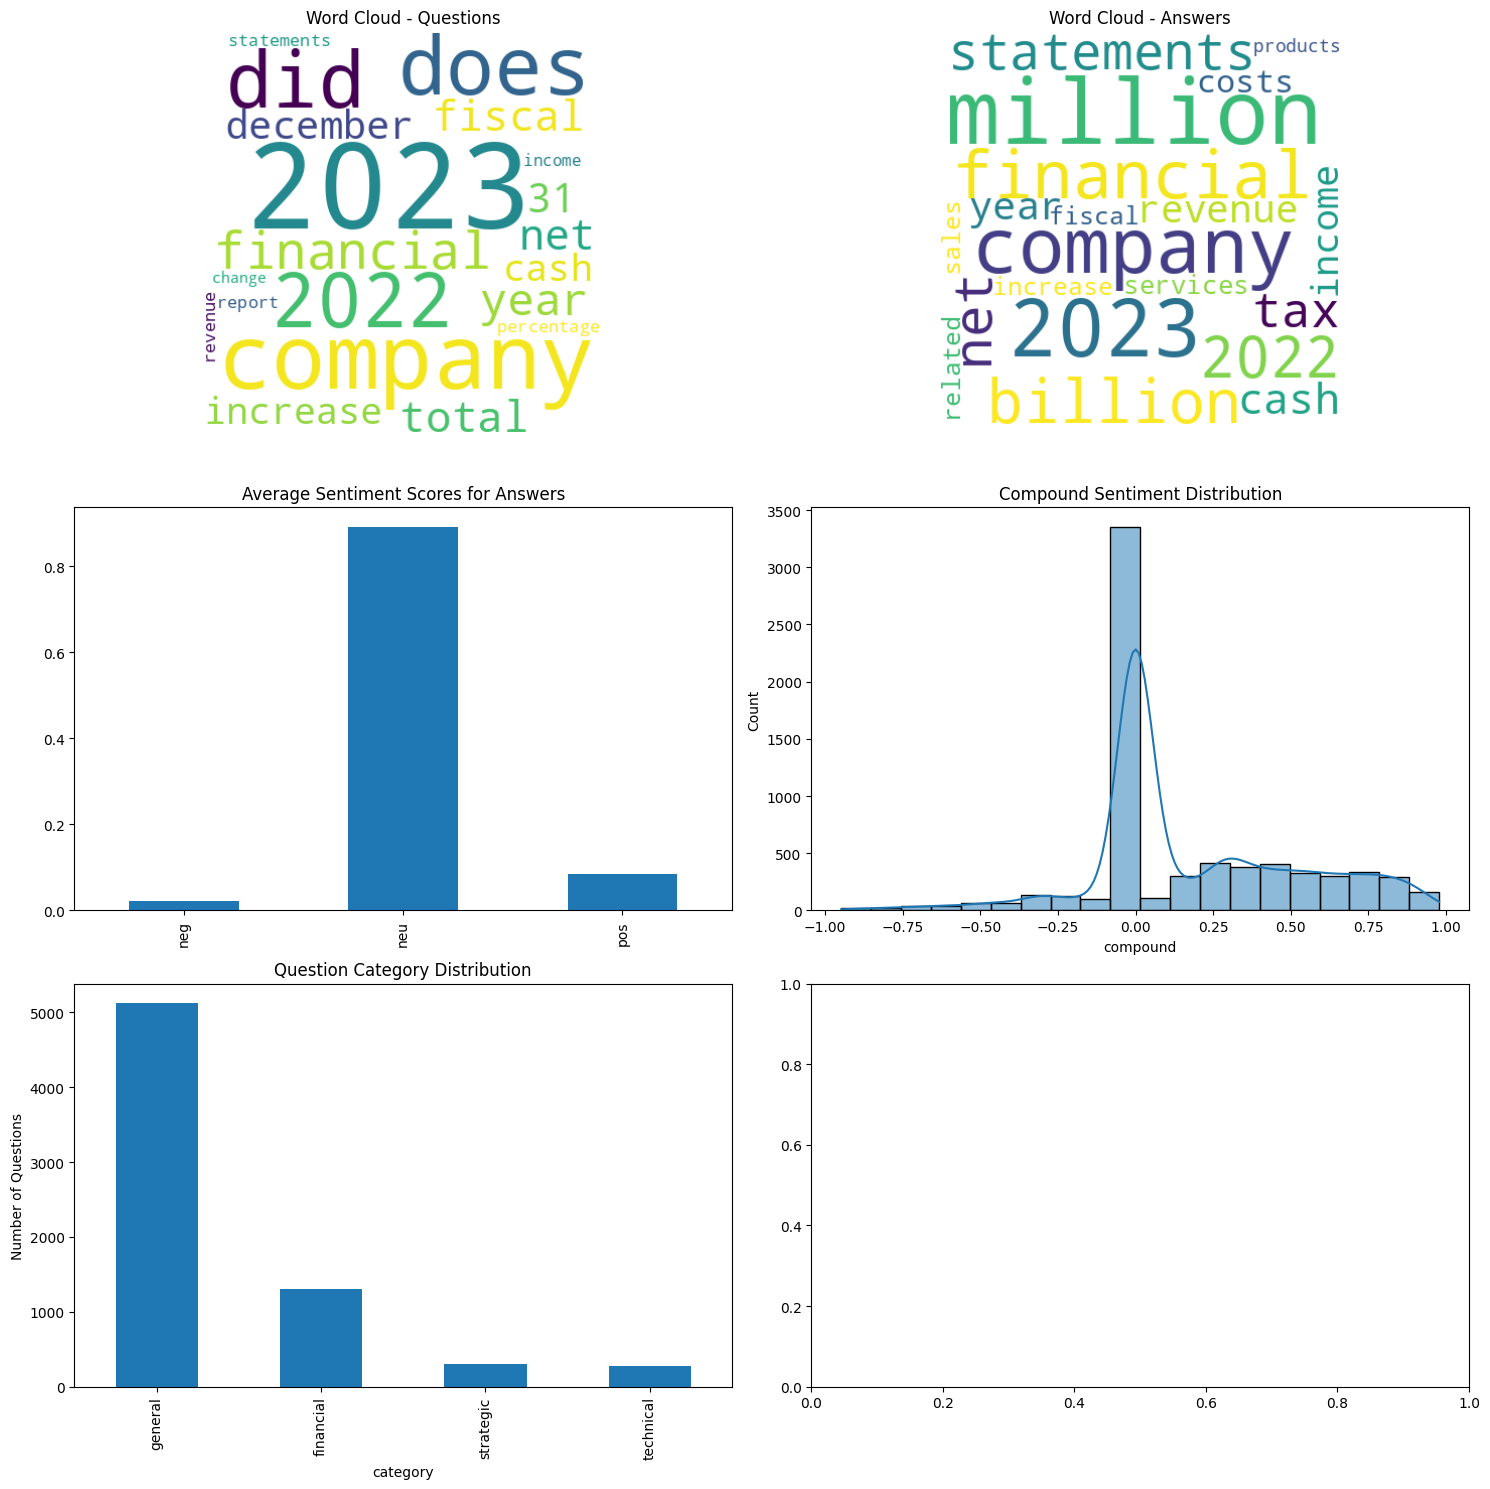

In [57]:
# Import required libraries for analysis
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns

# Ensure that plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Step 1: Word frequency or keyword analysis for 'questions' and 'answers'
def generate_word_frequency(text_data, top_n=20):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text_data)
    word_count = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    common_words = Counter(word_count).most_common(top_n)
    return common_words

# Step 2: Categorize questions into different types (financial, technical, strategic)
def categorize_question(question):
    keywords = {
        'financial': ['revenue', 'profit', 'loss', 'income', 'cost', 'expenditure'],
        'technical': ['GPU', 'technology', 'product', 'innovation', 'patent'],
        'strategic': ['strategy', 'market', 'competition', 'growth', 'acquisition']
    }
    for category, terms in keywords.items():
        if any(term in question.lower() for term in terms):
            return category
    return 'general'

# Step 3: Perform Sentiment Analysis
def perform_sentiment_analysis(text_data):
    sia = SentimentIntensityAnalyzer()
    sentiments = [sia.polarity_scores(text) for text in text_data]
    return sentiments

# Analyzing word frequency in 'questions' and 'answers'
question_word_freq_cleaned = generate_word_frequency(data_cleaned['question'], top_n=20)
answer_word_freq_cleaned = generate_word_frequency(data_cleaned['answer'], top_n=20)

# Categorizing questions
data_cleaned.loc[:, 'category'] = data_cleaned['question'].apply(categorize_question)
category_distribution_cleaned = data_cleaned['category'].value_counts()

# Perform sentiment analysis on 'answers'
sentiment_scores = perform_sentiment_analysis(data_cleaned['answer'])

# Convert sentiment scores to DataFrame
sentiment_df = pd.DataFrame(sentiment_scores)

# Step 4: Visualization

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Visualization 1: Word Frequency in Questions (cleaned data)
questions_wc_cleaned = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(question_word_freq_cleaned))
axs[0, 0].imshow(questions_wc_cleaned, interpolation='bilinear')
axs[0, 0].axis('off')
axs[0, 0].set_title('Word Cloud - Questions')

# Visualization 2: Word Frequency in Answers (cleaned data)
answers_wc_cleaned = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(answer_word_freq_cleaned))
axs[0, 1].imshow(answers_wc_cleaned, interpolation='bilinear')
axs[0, 1].axis('off')
axs[0, 1].set_title('Word Cloud - Answers')

# Visualization 3: Sentiment Analysis - Distribution of Sentiments
sentiment_df[['neg', 'neu', 'pos']].mean().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Average Sentiment Scores for Answers')

# Visualization 4: Sentiment Analysis - Compound Sentiment Scores
sns.histplot(sentiment_df['compound'], bins=20, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Compound Sentiment Distribution')

# Visualization 5: Question Category Distribution (cleaned data)
category_distribution_cleaned.plot(kind='bar', ax=axs[2, 0])
axs[2, 0].set_title('Question Category Distribution')
axs[2, 0].set_ylabel('Number of Questions')

# Adjust layout
plt.tight_layout()

# Show all visualizations
plt.show()

